In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

def lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R):
    '''Linear Kalman Filter
    
    - 状態方程式
        x = A * x_ + B * u + w, w ~ N(0,Q)
    - 観測方程式
        y = C * x + v, v ~ N(0,R)
    
    Parameters
    ==========
    - T : ステップ数
    - Y : 観測列
    - U : 入力列
    - mu0 : 初期状態推定値
    - Sigma0 : 初期誤差共分散行列
    - A, B, C, Q, R : カルマンフィルタの係数 
    
    Returns
    =======
    - M : 状態推定値列
    '''

    mu = mu0 # 初期状態推定値
    Sigma = Sigma0 # 初期誤差共分散行列

    M = [mu] # 状態推定値列

    for i in range(T):
        # 推定
        mu_ = A * mu + B * U[i]
        Sigma_ = Q + A * Sigma * A.T

        # 更新
        yi = Y[i+1] - C * mu_
        S = C * Sigma_ * C.T + R
        K = Sigma_ * C.T * S.I
        mu = mu_ + K * yi
        Sigma = Sigma_ - K * C * Sigma_
        M.append(mu)

    return M

In [25]:
# 状態方程式
# x = A * x_ + B * u + w, w ~ N(0,Q)
A = np.mat([[1,0], [0,1]])
B = np.mat([[1,0], [0,1]])
Q = np.mat([[1,0], [0,1]])
# 観測方程式
# y = C * x + v, v ~ N(0,R)
C = np.mat([[1,0], [0,1]])
R = np.mat([[2,0], [0,2]])

# 観測のテストデータの生成
T = 20 # 観測数
x = np.mat([[0],[0]]) # 初期位置
X = [x] # 状態列
Y = [x] # 観測列
u = np.mat([[2],[2]]) # 入力（一定）
U = [u] # 入力列
for i in range(T):
    x = A * x + B * u + np.random.multivariate_normal([0, 0], Q, 1).T
    X.append(x)
    y = C * x + np.random.multivariate_normal([0, 0], R, 1).T
    Y.append(y)
    U.append(u)
    

In [26]:
# LKF
mu0 = np.mat([[0],[0]]) # 初期状態推定値
Sigma0 = np.mat([[0,0],[0,0]]) # 初期誤差共分散行列

M = lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R)
mu = mu0 # 初期状態推定値
Sigma = Sigma0 # 初期誤差共分散行列

M = [mu] # 状態推定値列

for i in range(T):
    # 推定
    mu_ = A * mu + B * U[i]
    Sigma_ = Q + A * Sigma * A.T

    # 更新
    yi = Y[i+1] - C * mu_
    S = C * Sigma_ * C.T + R
    K = Sigma_ * C.T * S.I
    mu = mu_ + K * yi
    Sigma = Sigma_ - K * C * Sigma_
    M.append(mu)

In [28]:
mu0.shape

(2, 1)

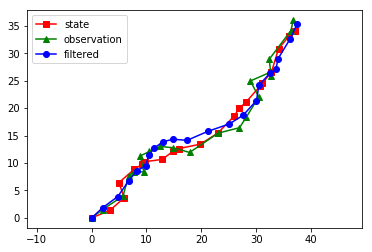

In [24]:
# 描画
a, b = np.array(np.concatenate(X,axis=1))
plt.plot(a,b,'rs-', label='state')
a, b = np.array(np.concatenate(Y,axis=1))
plt.plot(a,b,'g^-', label='observation')
a, b = np.array(np.concatenate(M,axis=1))
plt.plot(a,b,'bo-', label='filtered')
plt.axis('equal')
plt.legend()
plt.show()